In [78]:
# Importing libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

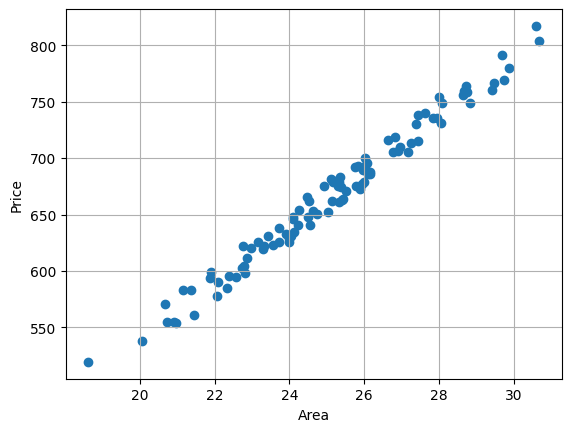

<Figure size 640x480 with 0 Axes>

In [79]:
# Generating a random data
np.random.seed(0)
area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20,50, size = len(area))
data = np.array([area, price])
data = pd.DataFrame(data = data.T, columns=['area','price'])

f = plt.figure()

plt.scatter(data['area'], data['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.grid()
plt.show()

plt.savefig('chapter2_plot_1.pdf');

In [80]:
W = sum(price*(area-np.mean(area))) / sum((area-np.mean(area))**2)
b = np.mean(price) - W*np.mean(area)

print("The regression coefficients are", W, b)

The regression coefficients are 24.815544052284988 43.4989785533412


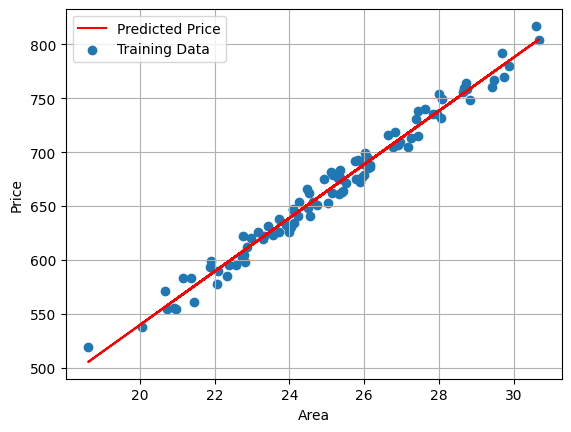

In [81]:
y_pred = W * area + b

# Visualizing the data
plt.plot(area, y_pred, color='red',label="Predicted Price")
plt.scatter(data['area'], data['price'], label="Training Data")
plt.xlabel('Area')
plt.ylabel('Price')
plt.grid()
plt.legend();

plt.savefig('chapter2_plot_2.pdf');

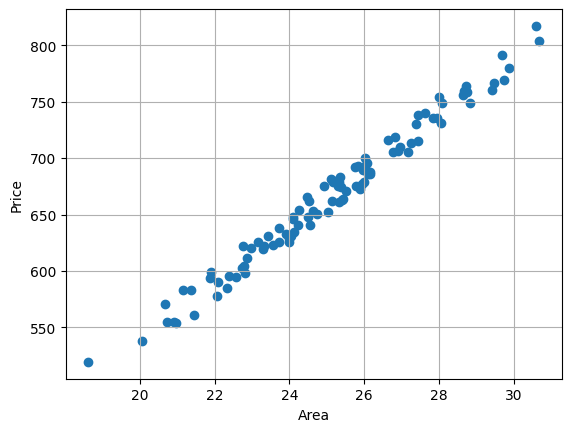

/Users/oscaraguilar/Desktop/Grand_View_Teaching/DATA-547/Fall_2024/DATA_547_ENV/data_547/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [82]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras as K
   
# Generating a random data
np.random.seed(0)
area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20,50, size = len(area))
data = np.array([area, price])
data = pd.DataFrame(data = data.T, columns=['area', 'price'])
plt.scatter(data['area'], data['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.grid()
plt.show()

# Normalize the data
data = (data - data.min()) / (data.max() - data.min())

# Defining the model
model = K.Sequential([K.layers.Dense(1, input_shape = [1,], activation=None)])
model.summary()

In [83]:
# Defining loss and optimizer
model.compile(loss='mean_squared_error', optimizer='sgd')

# Training the model
model.fit(x=data['area'], y=data['price'], epochs=200, batch_size=32,
          verbose=1, validation_split=0.2)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 12/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - val_loss: 0.0012


In [84]:
# Extracting estimated parameters
model.weights

[<KerasVariable shape=(1, 1), dtype=float32, path=sequential_16/dense_16/kernel>,
 <KerasVariable shape=(1,), dtype=float32, path=sequential_16/dense_16/bias>]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


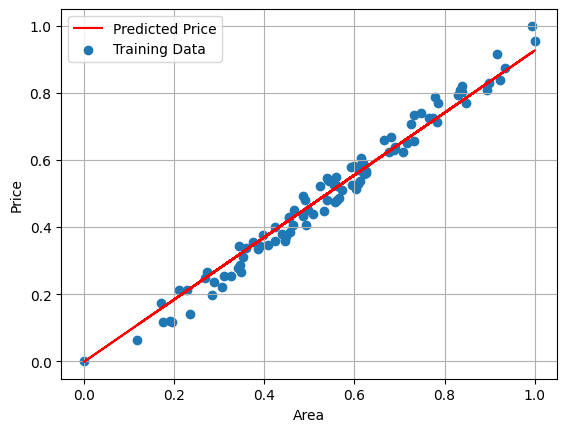

In [85]:
# Predicting price with the model
y_pred = model.predict(data['area'])

# Visualizing the data
plt.plot(data['area'], y_pred, color='red',label="Predicted Price")
plt.scatter(data['area'], data['price'], label="Training Data")
plt.xlabel("Area")
plt.ylabel("Price")
plt.grid()
plt.legend()

plt.savefig('chapter2_plot_4.pdf');

In [65]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras as K
from tensorflow.keras.layers import Dense, Normalization
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import seaborn as sns

# Defining inputs and target
diabetes = load_diabetes(as_frame=True, scaled=False)
X, Y = diabetes.data, diabetes.target

# Spliting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

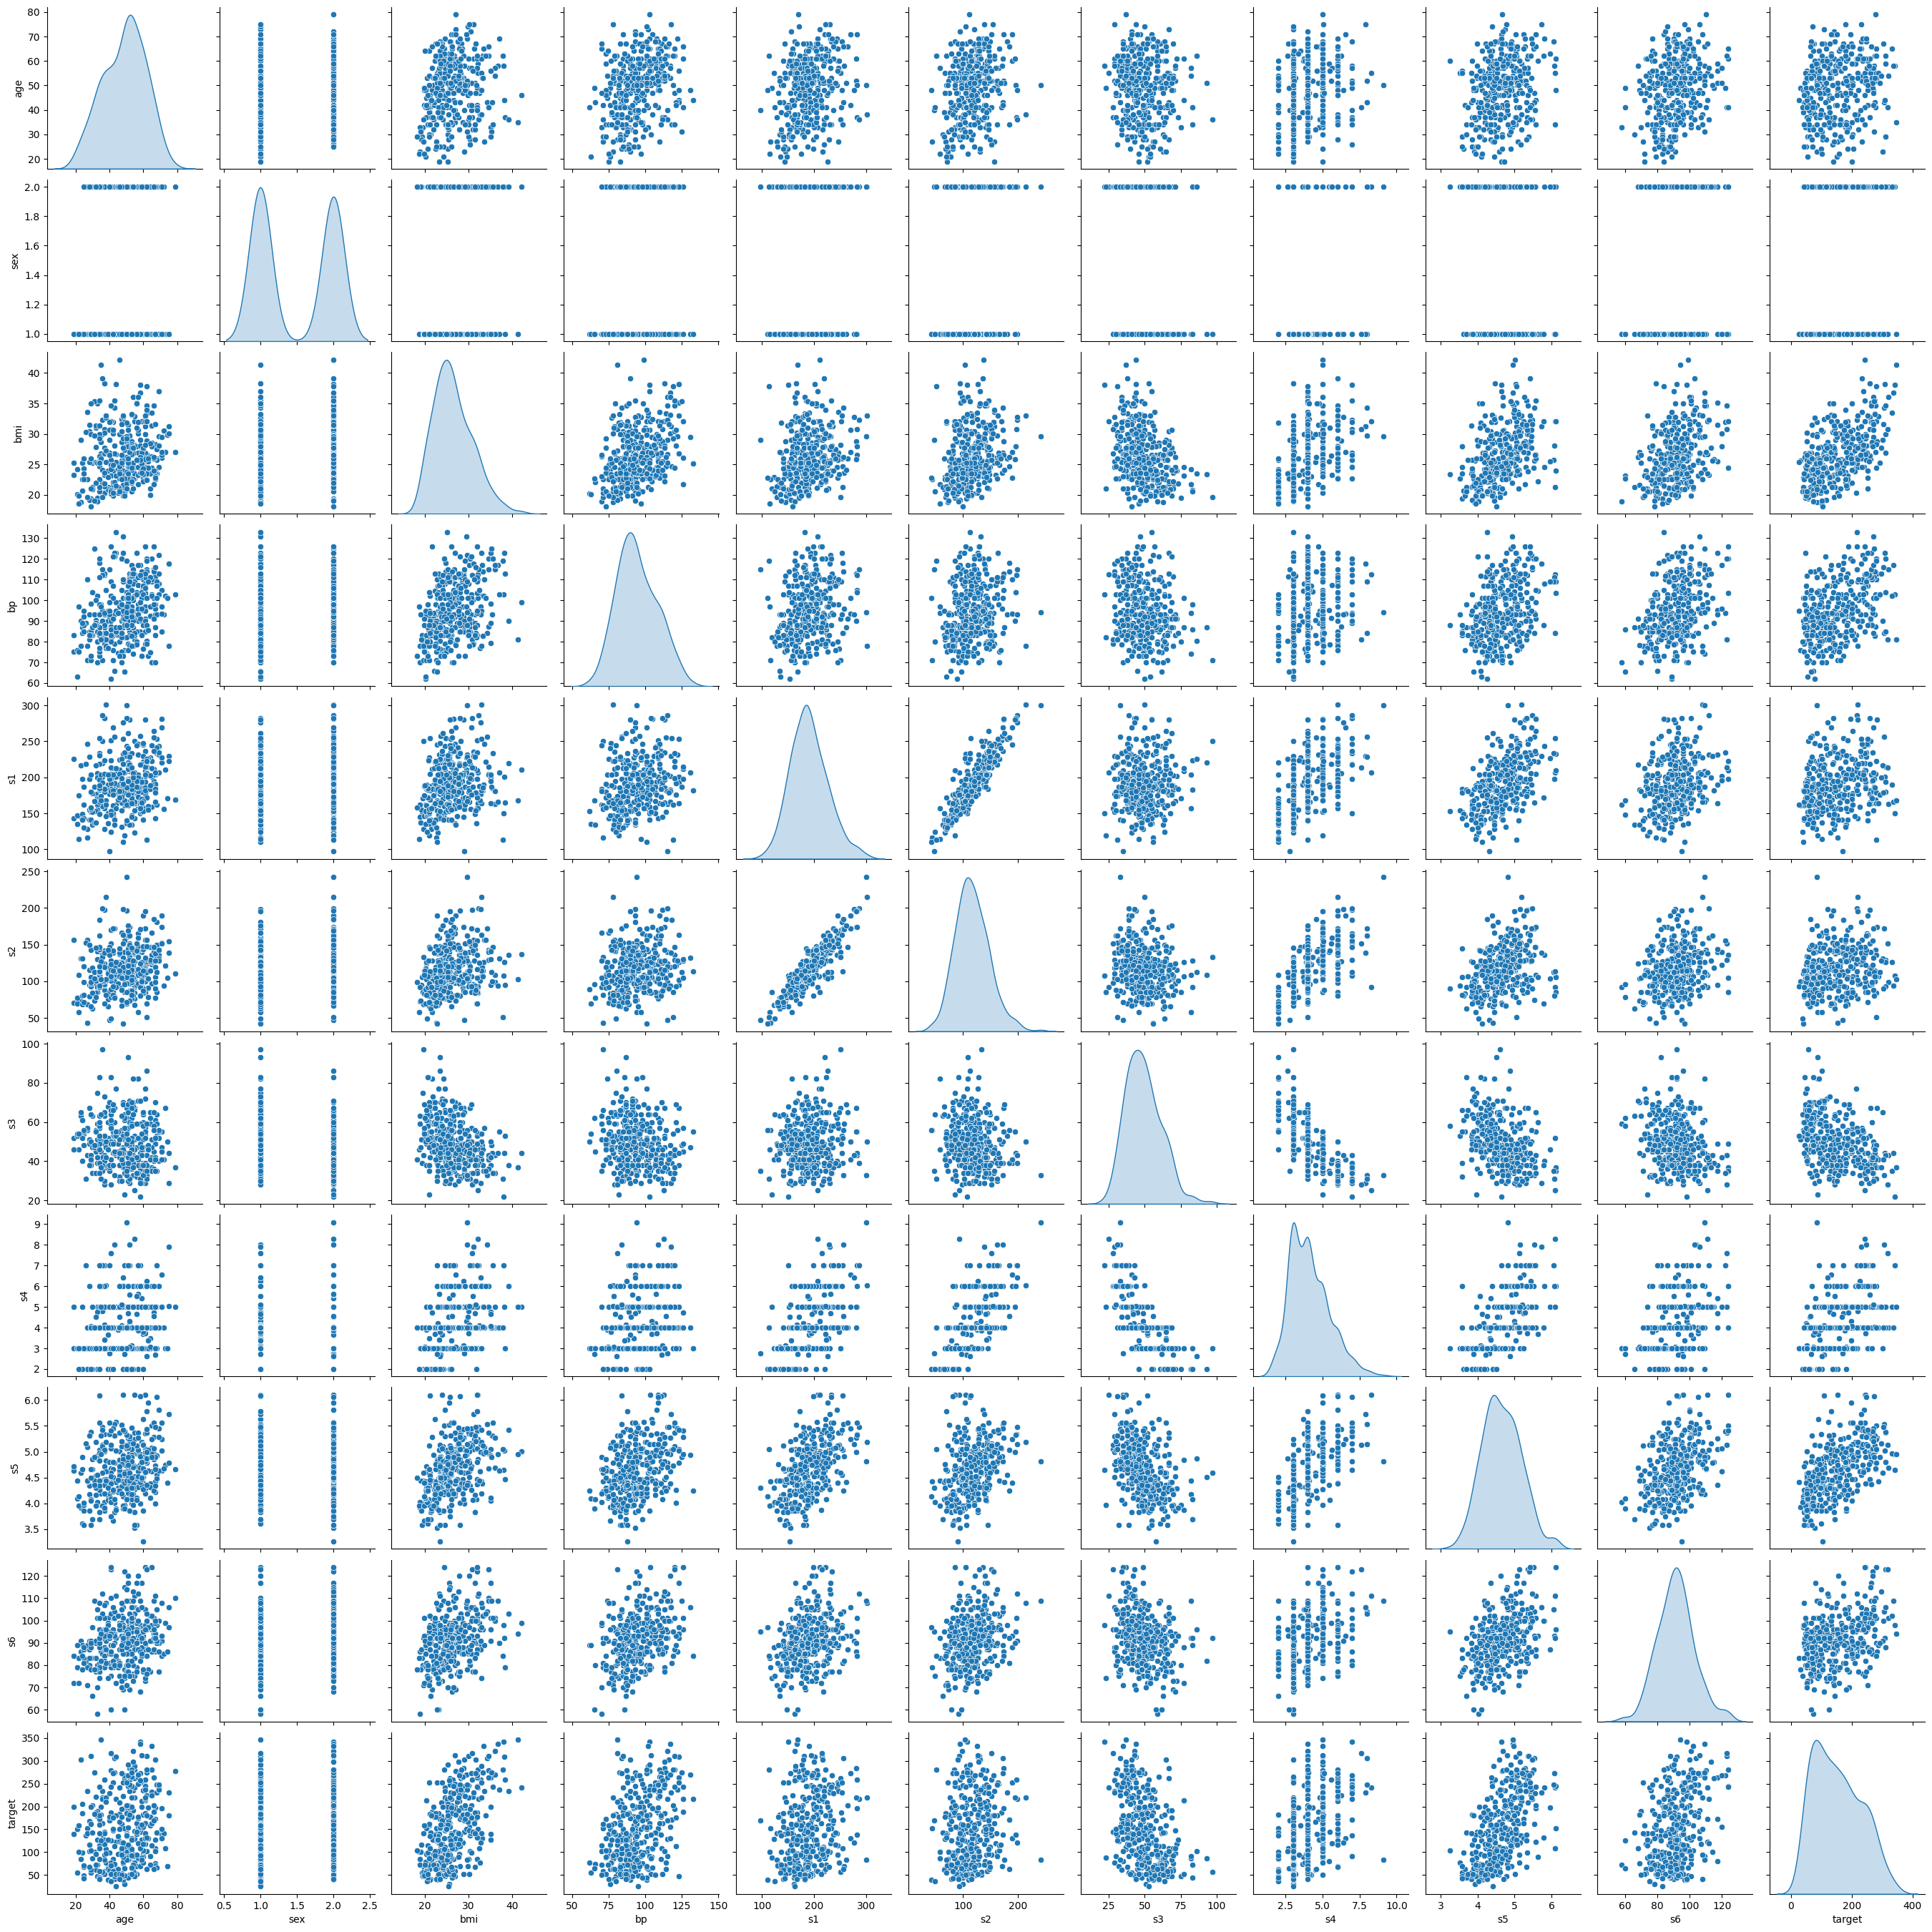

In [70]:
# Explorin the train dataset
train = pd.concat([X_train, Y_train], axis=1)
sns.pairplot(train, diag_kind='kde')

plt.savefig('chapter2_plot_5.pdf');

In [66]:
# Normalize the input data
data_normalizer = Normalization(axis=1)
data_normalizer.adapt(np.array(X_train))

# Defining the model
model = K.Sequential([
    data_normalizer,
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation=None)
])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_10                │ ?                      │            21 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (88.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21 (88.00 B)

In [67]:
# Defining optimizer and loss
model.compile(optimizer='adam', loss='mean_squared_error')

# Fitting model 
history = model.fit(x=X_train,y=Y_train, epochs=100,
                    verbose=1, validation_split=0.2)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 31793.6816 - val_loss: 25808.0430
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29373.8047 - val_loss: 25657.2109
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29882.1270 - val_loss: 25470.5195
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29580.0352 - val_loss: 25223.8105
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29463.5801 - val_loss: 24906.1738
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29278.6758 - val_loss: 24511.7891
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27096.0566 - val_loss: 24024.8301
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28087.3105 - val_loss: 23439.0781
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28350.0781 - val_loss: 22740.4551
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26557.1914 - val_loss: 21928.6250
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24111.9512 - val_loss: 20994.12

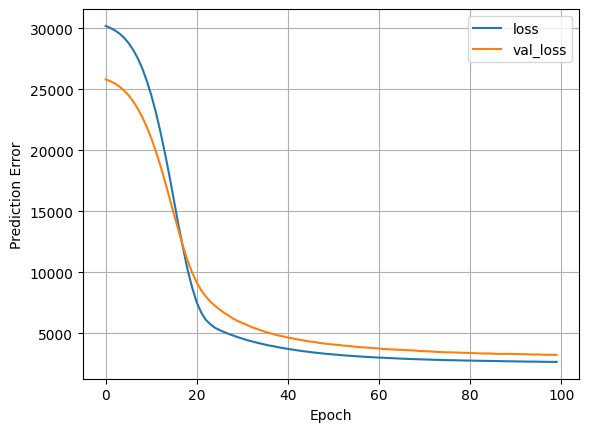

In [68]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Prediction Error')
plt.legend()
plt.grid(True)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


/var/folders/r5/3m3bkghn7z32j741187tcnl40000gn/T/ipykernel_68129/2379895690.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(Y_test, Y_test, 'k-', color='orange')


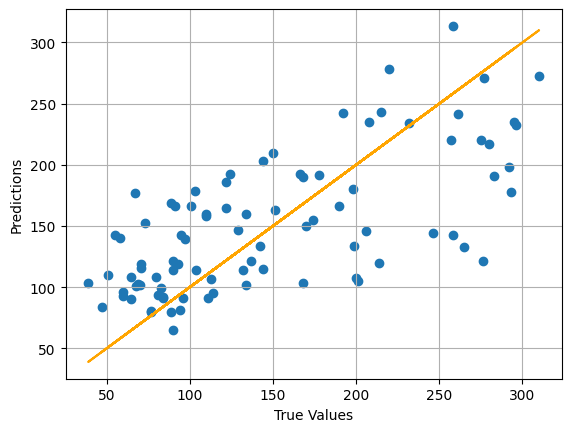

In [69]:
# Predicting on test dataset
y_pred = model.predict(X_test).flatten()

# Comparing prediction with true values
plt.scatter(Y_test, y_pred)
plt.plot(Y_test, Y_test, 'k-', color='orange')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid()